# Brazilian E-Commerce Public Dataset by Olist

## 1. Importing the data

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('data/olist_customers_dataset.csv')
items = pd.read_csv('data/olist_order_items_dataset.csv')
payments = pd.read_csv('data/olist_order_payments_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
names = pd.read_csv('data/product_category_name_translation.csv')

## 2. Joining the datasets

In [2]:
product_names = pd.DataFrame()
product_names = pd.merge(products[['product_id', 'product_category_name']],names, on="product_category_name")
items_and_names = pd.DataFrame()
items_and_names = pd.merge(items[['order_id', 'product_id', 'price']],product_names[['product_id', 'product_category_name_english']], on="product_id")
items_names_payments = pd.DataFrame()
items_names_payments = pd.merge(items_and_names,payments[['order_id', 'payment_type']], on="order_id")
items_names_payments_orders = pd.DataFrame()
items_names_payments_orders = pd.merge(items_names_payments,orders[['order_id','customer_id','order_purchase_timestamp']], on="order_id")
all = pd.DataFrame()
all = pd.merge(items_names_payments_orders,customers[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']], on="customer_id")
all.head()

,order_id,product_id,price,product_category_name_english,payment_type,customer_id,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,28013,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff,boleto,e6eecc5a77de221464d1c4eaff0a9b64,2017-06-28 11:52:20,75800,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff,credit_card,4ef55bf80f711b372afebcb7c715344a,2018-05-18 10:25:53,30720,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,30407a72ad8b3f4df4d15369126b20c9,2017-08-01 18:38:42,83070,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,91a792fef70ecd8cc69d3c7feb3d12da,2017-08-10 21:48:40,36400,conselheiro lafaiete,MG


## 3. Cleaning and preparing the data
### 3.1. Removing duplicates

In [3]:
all.shape

(115878, 10)

In [4]:
len(all['order_id'].unique())

97255

In [5]:
all = all.drop_duplicates(subset='order_id',keep='first')

In [6]:
all.shape

(97255, 10)

### 3.2. Converting to datetime and rounding to a day

In [7]:
type(all['order_purchase_timestamp'][1])

str

In [8]:
all['order_purchase_timestamp']= pd.to_datetime(all['order_purchase_timestamp'])

In [15]:
all['order_purchase_day'] = all['order_purchase_timestamp'].dt.round('1d')

## 4. Exporting to csv

In [9]:
all.to_excel('merged.xlsx', sheet_name='Sheet1')
all.to_csv('merged.csv')

In [16]:
# table for the map with the distribution of orders
all[['order_id','price','customer_zip_code_prefix','customer_city','customer_state']].to_csv('map.csv')
# table for the days of purchases
all[['order_id','price','order_purchase_day']].to_csv('day.csv')
# table for the times of purchases
all[['order_id','price','order_purchase_timestamp']].to_csv('time.csv')
# table for the pie chart with the payment types
all[['order_id','price','payment_type','customer_zip_code_prefix','customer_city','customer_state']].to_csv('payment.csv')

## 5. Exploring and visualising the data

In [10]:
all.describe()

,price,order_purchase_timestamp,customer_zip_code_prefix
count,97255.000000,97255,97255.000000
mean,125.983444,2018-01-01 15:25:30.421068288,35146.411999
min,0.850000,2016-09-04 21:15:19,1003.000000
25%,41.900000,2017-09-13 16:38:40.500000,11380.000000
50%,79.000000,2018-01-20 20:57:48,24425.000000
75%,139.900000,2018-05-05 21:46:09,58862.500000
max,6735.000000,2018-09-03 09:06:57,99980.000000
std,190.927477,NaN,29787.788224


Text(0.5, 1.0, 'Distribution of State')

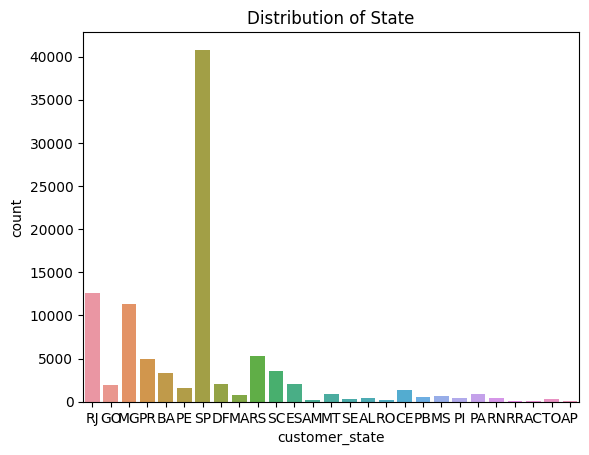

In [11]:
# The distribution of customer state to recognise different distributions
sns.countplot(x='customer_state', data=all)
plt.title('Distribution of State')

Text(0.5, 0, 'Time of purchase')

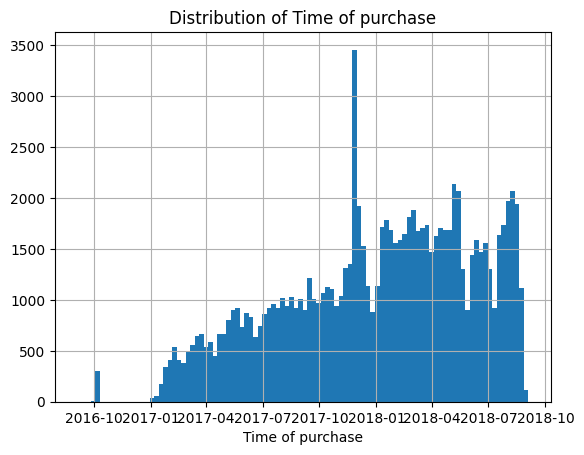

In [12]:
# Histogram of times of purchases
all.hist('order_purchase_timestamp', bins=100)
plt.title('Distribution of Time of purchase')
plt.xlabel('Time of purchase')

Text(0.5, 1.0, 'Distribution of Payment type')

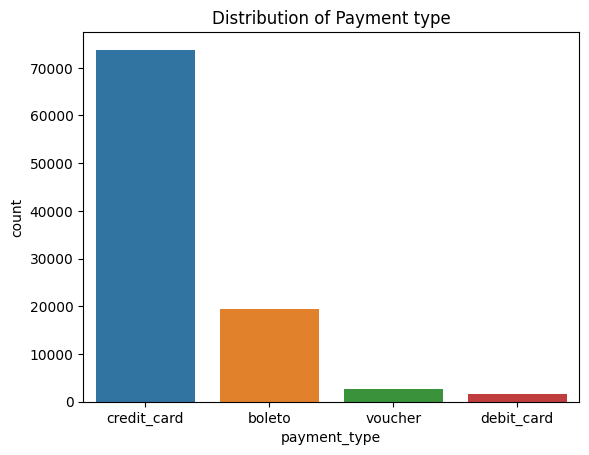

In [13]:
# The distribution of payment type
sns.countplot(x='payment_type', data=all)
plt.title('Distribution of Payment type')

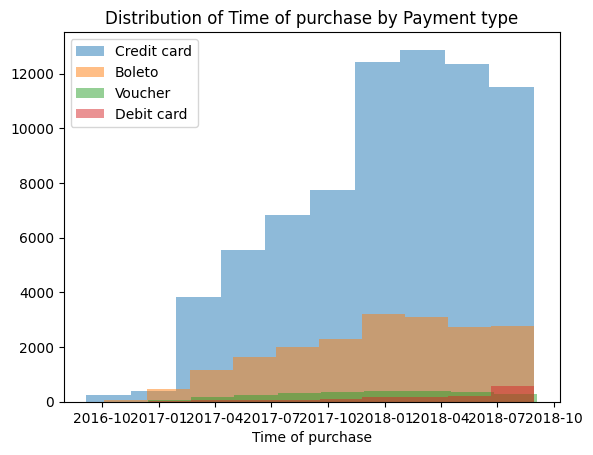

In [14]:
# Histogram of Time of purchase by Payment type
plt.hist('order_purchase_timestamp', data=all[all['payment_type'] == 'credit_card'], alpha=0.5, label='Credit card')
plt.hist('order_purchase_timestamp', data=all[all['payment_type'] == 'boleto'], alpha=0.5, label='Boleto')
plt.hist('order_purchase_timestamp', data=all[all['payment_type'] == 'voucher'], alpha=0.5, label='Voucher')
plt.hist('order_purchase_timestamp', data=all[all['payment_type'] == 'debit_card'], alpha=0.5, label='Debit card')
plt.title('Distribution of Time of purchase by Payment type')
plt.xlabel('Time of purchase')
plt.legend()

## 